In [1]:
include("../library/utils.jl")
include("../library/eqn.jl")
using .Utils: truncate_to_decimal_places

# Q1

Given Equation:

$$
e^{-x} -x = 0
$$

Solving the given equation is equivalent to solving this equation:
$$
x = e^{-x}
$$

according to the fixed point method, our function $\phi(x)$ is:

$$
\phi(x) = e^{-x}
$$

In [2]:
function phi(x)
    return exp(-x)
end

ans = Eqn.fixed_point_iteration(phi, 1)
print("Fixed point iteration: ")
println(truncate_to_decimal_places(ans, 4))

Fixed point iteration: 0.5671


# Q2

In [2]:
function legendre(x, n)
    """
    The Legendre polynomial of degree n.

    Parameters:
    - x: Float64 or array of Float64: the value(s) at which the polynomial is evaluated, x in [-1, 1].
    - n: Int: the degree of the polynomial.

    Returns:
    - Float64 or array of Float64: the Legendre polynomial value(s).
    """
    # Ensure n is a non-negative integer
    if n < 0 || n isa AbstractFloat
        throw(ArgumentError("n must be a non-negative integer"))
    end

    # Ensure x is in the range [-1, 1]
    if any(x .< -1) || any(x .> 1)
        throw(ArgumentError("x must be in the range [-1, 1]"))
    end

    if n == 0
        return 1.0
    elseif n == 1
        return x
    else
        return ((2n - 1) * x * legendre(x, n-1) - (n-1) * legendre(x, n-2)) / n
    end
end

legendre (generic function with 1 method)

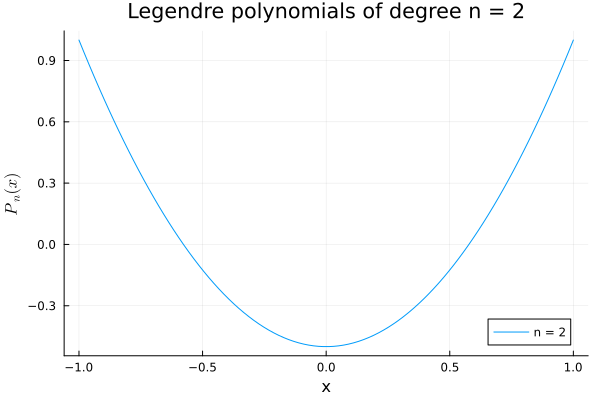

In [9]:
using Plots

function plot_legendre(n)
    x = range(-1, 1, length=100)
    plot(x, legendre.(x, n), label="n = $n", xlabel="x", ylabel="\$P_{n}(x)\$", title="Legendre polynomials of degree n = $n")
    # legend()
    # show()
end

plot_legendre(2)

In [ ]:
function legendre_derivative(x, n)
    """
    The derivative of the Legendre polynomial of degree n.

    Parameters:
    - x: Float64: the value at which the derivative is evaluated, x cannot be 1 or -1.
    - n: Int: the degree of the Legendre polynomial.

    Returns:
    - Float64: the value of the derivative.
    """
    if n == 0
        return 0.0
    end

    if x == 1.0 || x == -1.0
        throw(ArgumentError("x cannot be 1 or -1"))
    else
        return n * (x * legendre(x, n) - legendre(x, n-1)) / (x^2 - 1)
    end
end
